# Model Creation: Round 2


#### Importing the necessary libraries

In [24]:
#DATA WRANGLING
import pandas as pd # Dataframes
from pandas.io.json import json_normalize # JSON wrangler
import statsapi # Python wrapper MLB data API

In [98]:
#DATA MANIPULATION AND MODELLING
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn_pandas import DataFrameMapper, FunctionTransformer, gen_features, pipeline
from sklearn_pandas.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import xgboost as xgb
import os
import pitch_functions

In [26]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [175]:
each_pitch = pd.read_csv('raw_data/cleaned_pitches.csv')

### Data Frame Prep

- Make categorical data frame & and numerical standardized data frame
- concatenate these dataframes together then run tests

## Pipeline Preparation

In [176]:
pitch_clean = each_pitch.dropna().copy()

In [177]:
pitch_clean = pitch_clean[:100000]

In [178]:
pitch_clean.head()

,pitcher,WAR_x,WHIP,ERA,SO,hitter,SLG,OPS,WAR_y,about.atBatIndex,...,matchup.batSide.code,matchup.pitchHand.code,matchup.pitcher.id,matchup.splits.menOnBase,pitchData.nastyFactor,pitchData.zone,pitchNumber,pitch_type,prior_pitch_type,count
0,Kendrys Morales,0.0,1.0,0.0,0,Matt Chapman,0.508,0.864,8.2,70,...,R,R,434778,Men_On,32.94,1.0,2.0,Changeup,Changeup,1.0-1.0
1,Kendrys Morales,0.0,1.0,0.0,0,Matt Chapman,0.508,0.864,8.2,70,...,R,R,434778,Men_On,31.44,4.0,3.0,Breaking_Ball,Changeup,1.0-2.0
2,Kendrys Morales,0.0,1.0,0.0,0,Matt Chapman,0.508,0.864,8.2,70,...,R,R,434778,Men_On,2.66,14.0,4.0,Breaking_Ball,Breaking_Ball,2.0-2.0
3,Kendrys Morales,0.0,1.0,0.0,0,Matt Chapman,0.508,0.864,8.2,70,...,R,R,434778,Men_On,3.82,14.0,5.0,Breaking_Ball,Breaking_Ball,3.0-2.0
4,Kendrys Morales,0.0,1.0,0.0,0,Matt Chapman,0.508,0.864,8.2,70,...,R,R,434778,Men_On,35.64,11.0,6.0,Breaking_Ball,Breaking_Ball,4.0-2.0


In [179]:
pitch_dicts = {'Fastball': 1,
              'Breaking_Ball': 0,
              'Changeup': 0}

In [180]:
pitch_clean['pitch_type'] = pitch_clean['pitch_type'].map(pitch_dicts)

In [181]:
pitch_clean['prior_pitch_type'] = pitch_clean['prior_pitch_type'].map(pitch_dicts)

In [182]:
target = pitch_clean['pitch_type']

In [183]:
predictors = pitch_clean.drop(['pitch_type', 'hitter', 'pitcher'], axis=1)

In [184]:
num_features = list(predictors.select_dtypes(exclude='object'))

In [185]:
num_features

['WAR_x',
 'WHIP',
 'ERA',
 'SO',
 'SLG',
 'OPS',
 'WAR_y',
 'about.atBatIndex',
 'about.inning',
 'matchup.pitcher.id',
 'pitchData.nastyFactor',
 'pitchData.zone',
 'pitchNumber',
 'prior_pitch_type']

In [186]:
num_features = [i for i in num_features if i not in {'about.inning', 'pitchData.zone', 'matchup.pitcher.id'}]

In [187]:
num_features

['WAR_x',
 'WHIP',
 'ERA',
 'SO',
 'SLG',
 'OPS',
 'WAR_y',
 'about.atBatIndex',
 'pitchData.nastyFactor',
 'pitchNumber',
 'prior_pitch_type']

In [188]:
numeric_transformer = Pipeline(steps=[('keeper', None)])

In [189]:
cat_features = list(predictors.select_dtypes(include='object'))
cat_features.extend(['about.inning', 'pitchData.zone', 'count', 'matchup.pitcher.id'])

In [190]:
cat_transfomer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore', categories='auto'))])

In [191]:
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, num_features),
                                              ('cat', cat_transfomer, cat_features)])

In [192]:
classifiers = [DecisionTreeClassifier(), RandomForestClassifier(n_estimators=100, max_depth=5), 
               GradientBoostingClassifier(n_estimators=100), xgb.XGBClassifier()]

## Model Creation

In [193]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, random_state=10)

In [157]:
# X_train_s1 = X_train[num_features]
# X_test_s1 = X_test[num_features]

In [158]:
scaler = StandardScaler()

In [159]:
scaler.fit(X_train_s1)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [160]:
X_train_s = scaler.transform(X_train_s1)
X_test_s = scaler.transform(X_test_s1)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [161]:
X_train_c = X_train[cat_features] 
X_test_c = X_test[cat_features]

In [162]:
X_train_sdf = pd.DataFrame(X_train_s,
                   columns=X_train_s1.columns)

In [163]:
X_test_sdf = pd.DataFrame(X_test_s,
                   columns=X_test_s1.columns)

In [164]:
X_train_sdf.head(2)

,WAR_x,WHIP,ERA,SO,SLG,OPS,WAR_y,about.atBatIndex,pitchData.nastyFactor,pitchNumber,prior_pitch_type
0,1.928355,1.171369,0.749140,0.633773,-0.744421,-0.646901,-0.924905,-1.890758,-1.311831,0.936532,0.776493
1,-0.572645,-0.520228,0.086192,-0.694605,-0.823360,-1.165129,-0.973927,0.440533,-0.796811,0.281590,0.776493


In [165]:
X_train = X_train.reset_index()

In [166]:
X_test = X_test.reset_index()

In [167]:
final_train = pd.concat([X_train.drop(num_features, axis=1), X_train_sdf], axis=1)

In [168]:
final_test = pd.concat([X_test.drop(num_features, axis=1), X_test_sdf], axis=1)

In [169]:
final_train.head()

,index,about.halfInning,about.inning,details.call.description,details.description,matchup.batSide.code,matchup.pitchHand.code,matchup.pitcher.id,matchup.splits.menOnBase,pitchData.zone,...,WHIP,ERA,SO,SLG,OPS,WAR_y,about.atBatIndex,pitchData.nastyFactor,pitchNumber,prior_pitch_type
0,73663,top,1,Ball - Called,Ball,R,L,607536,Men_On,14.0,...,1.171369,0.749140,0.633773,-0.744421,-0.646901,-0.924905,-1.890758,-1.311831,0.936532,0.776493
1,46694,bottom,7,Ball - Called,Ball,R,R,456696,Men_On,14.0,...,-0.520228,0.086192,-0.694605,-0.823360,-1.165129,-0.973927,0.440533,-0.796811,0.281590,0.776493
2,12163,bottom,8,Hit Into Play - Out(s),"In play, out(s)",L,R,453172,Empty,13.0,...,-0.269621,-1.136119,-0.768403,-0.383556,-0.585932,-0.238589,0.829081,2.259167,-1.028294,0.776493
3,58752,bottom,9,Strike - Swinging,Called Strike,R,R,476454,Loaded,7.0,...,-0.081666,0.438383,-0.079615,0.462222,0.259999,-0.728815,1.217630,0.451149,-1.028294,-1.287842
4,49821,bottom,2,Ball - Called,Ball,R,L,489119,RISP,14.0,...,0.920762,0.169061,-0.879102,-0.541434,-0.563069,-0.728815,-1.329521,-0.076946,0.281590,-1.287842


(array([12588., 18671., 12640., 11706.,  2407.,  6844.,  1387.,  1656.,
         3693.,  3408.]),
 array([-1.2547359 , -0.85684958, -0.45896326, -0.06107694,  0.33680938,
         0.7346957 ,  1.13258202,  1.53046834,  1.92835466,  2.32624098,
         2.7241273 ]),
 <a list of 10 Patch objects>)

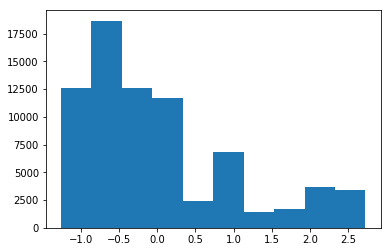

In [170]:
plt.hist(final_train['WAR_x'])

In [171]:
final_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
index                       25000 non-null int64
about.halfInning            25000 non-null object
about.inning                25000 non-null int64
details.call.description    25000 non-null object
details.description         25000 non-null object
matchup.batSide.code        25000 non-null object
matchup.pitchHand.code      25000 non-null object
matchup.pitcher.id          25000 non-null int64
matchup.splits.menOnBase    25000 non-null object
pitchData.zone              25000 non-null float64
count                       25000 non-null object
WAR_x                       25000 non-null float64
WHIP                        25000 non-null float64
ERA                         25000 non-null float64
SO                          25000 non-null float64
SLG                         25000 non-null float64
OPS                         25000 non-null float64
WAR_y                       25000 non

In [194]:
def run_classifier_models(classifiers, X_train, X_test, y_train, y_test):
    for classifier in classifiers:
        #Intialize classifier pipeline
        clf1 = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', classifier)])
        clf1.fit(X_train, y_train)

        # Print accuracy metrics for each model using pitch_functions.py
        print(classifier)
        print('\n')
        print('Training Metrics')
        pitch_functions.calc_acc_and_f1_score(y_train, clf1.predict(X_train))
        print('\n')
        print('Testing Metrics')
        pitch_functions.calc_acc_and_f1_score(y_test, clf1.predict(X_test))
        print('\n')

- Need to get back to the drawing board
- lets try dividing this up a little bit
- national league teams
- american league teams
- start with the houston astros 

In [195]:
run_classifier_models(classifiers, X_train, X_test, y_train, y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


Training Metrics
Accuracy:1.000
F1-Score: 1.000
AUC: 1.000


Testing Metrics
Accuracy:0.716
F1-Score: 0.716
AUC: 0.703


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


Training Metrics
Accuracy:0.656
F1-Score: 0.566
AUC: 0.565


Testing Metrics
Accuracy:0.654
F1-Score: 0